This notebook will try to look at how much inter-playback variation is there at the mic and speaker level. 
In a previous analysis (```./smp-mic-directionalities/spu-mic-directionalities.ipynb```), I'd seen that the tone spectra were very different for SMP4 between the first and last on-axis recordings. This bothered me, and so I had to do some more measurements with SMP4 *and* a GRAS mic 2cm flush to the 'wall'. 

Here, I measure the stability of playback recordings obtained from the SMP+GRAS combination. All recordings were on-axis at ~2m. Amplifier 401 and Speaker 504 were used. SMP4 had a gain of 30dB while the GRAS 1/4" had a gain of 50dB. 

Notebook initiation date: 2021-06-17

In [1]:
import glob
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np 
import scipy.signal as signal
import sys
sys.path.append('..//')
import calibration_rec_analysis
from calibration_rec_analysis import calculate_tones_rec_level
sys.path.append('../')
sys.path.append('../../')
import playback_code.playback_analysis as pa

from fullscale_calculations import *

In [2]:

fs = 192000
b,a = signal.butter(2, np.array([9000,95500])/(fs*0.5), 'bandpass')

In [3]:
%matplotlib notebook

In [4]:
tonefreqs = np.arange(10000, 95000, 1000)

In [5]:
smpgras_recs = glob.glob('../../2021-06-15/*_30&50_*.wav')
smpgras_recs

['../../2021-06-15\\smp4-2mwall_amp401_speaker504_gaindB_30&50_azimuth_angle_0_2021-06-15_19-45-13.wav',
 '../../2021-06-15\\smp4-2mwall_amp401_speaker504_gaindB_30&50_azimuth_angle_0_2021-06-15_19-47-44.wav',
 '../../2021-06-15\\smp4-2mwall_amp401_speaker504_gaindB_30&50_azimuth_angle_0_2021-06-15_19-50-09.wav',
 '../../2021-06-15\\smp4-2mwall_amp401_speaker504_gaindB_30&50_azimuth_angle_0_2021-06-15_19-52-49.wav',
 '../../2021-06-15\\smp4-2mwall_amp401_speaker504_gaindB_30&50_azimuth_angle_0_2021-06-15_19-55-12.wav',
 '../../2021-06-15\\smp4-2mwall_amp401_speaker504_gaindB_30&50_azimuth_angle_0_2021-06-15_19-57-43.wav',
 '../../2021-06-15\\smp4-2mwall_amp401_speaker504_gaindB_30&50_azimuth_angle_0_2021-06-15_20-00-42.wav',
 '../../2021-06-15\\smp4-2mwall_amp401_speaker504_gaindB_30&50_azimuth_angle_0_2021-06-15_20-03-05.wav',
 '../../2021-06-15\\smp4-2mwall_amp401_speaker504_gaindB_30&50_azimuth_angle_0_2021-06-15_20-05-32.wav',
 '../../2021-06-15\\smp4-2mwall_amp401_speaker504_gaind

In [6]:
audio, fs = sf.read(smpgras_recs[0])

In [7]:
smp4_audio = []
grasmic_audio = []
for each in smpgras_recs:
    audio, fs = sf.read(each)
    smp_audio, gras_audio = pa.get_only_tones(audio[:,0],1.5), pa.get_only_tones(audio[:,1],1.5)
    smp4_audio.append(signal.lfilter(b,a,smp_audio))
    grasmic_audio.append(signal.lfilter(b,a,gras_audio))

In [8]:
smpgras_recs

['../../2021-06-15\\smp4-2mwall_amp401_speaker504_gaindB_30&50_azimuth_angle_0_2021-06-15_19-45-13.wav',
 '../../2021-06-15\\smp4-2mwall_amp401_speaker504_gaindB_30&50_azimuth_angle_0_2021-06-15_19-47-44.wav',
 '../../2021-06-15\\smp4-2mwall_amp401_speaker504_gaindB_30&50_azimuth_angle_0_2021-06-15_19-50-09.wav',
 '../../2021-06-15\\smp4-2mwall_amp401_speaker504_gaindB_30&50_azimuth_angle_0_2021-06-15_19-52-49.wav',
 '../../2021-06-15\\smp4-2mwall_amp401_speaker504_gaindB_30&50_azimuth_angle_0_2021-06-15_19-55-12.wav',
 '../../2021-06-15\\smp4-2mwall_amp401_speaker504_gaindB_30&50_azimuth_angle_0_2021-06-15_19-57-43.wav',
 '../../2021-06-15\\smp4-2mwall_amp401_speaker504_gaindB_30&50_azimuth_angle_0_2021-06-15_20-00-42.wav',
 '../../2021-06-15\\smp4-2mwall_amp401_speaker504_gaindB_30&50_azimuth_angle_0_2021-06-15_20-03-05.wav',
 '../../2021-06-15\\smp4-2mwall_amp401_speaker504_gaindB_30&50_azimuth_angle_0_2021-06-15_20-05-32.wav',
 '../../2021-06-15\\smp4-2mwall_amp401_speaker504_gaind

<IPython.core.display.Javascript object>


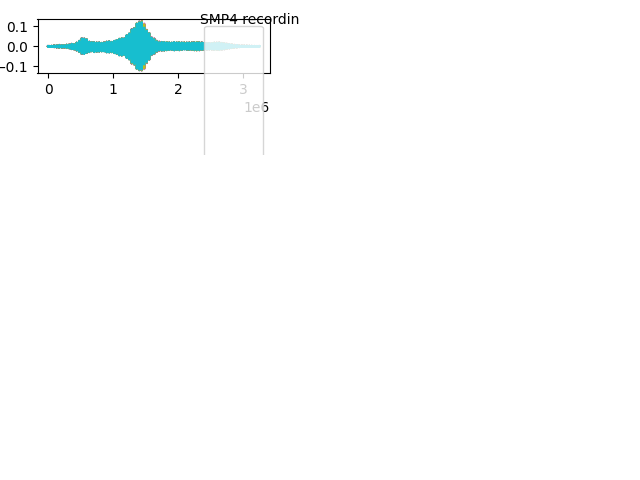

In [9]:
plt.figure()
plt.subplot(211)
plt.text(0.7,0.9,'SMP4 recording',transform=plt.gca().transAxes)
[plt.plot(each, label=i) for i,each in enumerate(smp4_audio)];
plt.legend()
plt.subplot(212)
plt.text(0.7,0.9,'GRAS recording',transform=plt.gca().transAxes)
[plt.plot(each, label=i) for i,each in enumerate(grasmic_audio)];
plt.legend()

### There appears to be more inter-recording variation in SMP4 than in the GRAS!!

This is odd - let's take a closer look at where the variation is coming from. 

In [10]:
fs = 192000
fireface_dbu_FS = 27
spu_dbVrmsPa = -42 # just take a typical value --THIS IS NOT AN EXACT VALUE!!!!
rec_gain = 30
tonefreqs = np.arange(10000, 95000, 1000)

In [11]:
smp4_onaxis_data = []
for each in smp4_audio:
    out = calculate_tones_rec_level(each, fs, tonefreqs, fireface_dbu_FS, rec_gain, spu_dbVrmsPa, freq_bw=500)
    smp4_onaxis_data.append(out)
    
gras_onaxis_data = []
for each in grasmic_audio:
    out = calculate_tones_rec_level(each, fs, tonefreqs, fireface_dbu_FS, rec_gain, spu_dbVrmsPa, freq_bw=500)
    gras_onaxis_data.append(out)

<IPython.core.display.Javascript object>


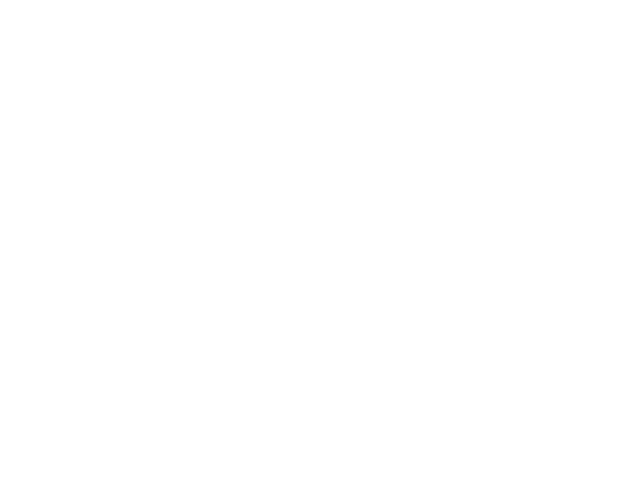

Text(0.5, 0, 'Frequency, Hz')

In [12]:
plt.figure()
a00 = plt.subplot(211)
plt.text(70000,90,'SMP4')
for each in smp4_onaxis_data:
    plt.plot(tonefreqs, each['dbspl_rms'])
plt.xlim(20000,95000);
plt.ylim(60,106)

a01 = plt.subplot(212, sharex=a00, sharey=a00)
plt.text(70000,90,'GRAS')
for each in gras_onaxis_data:
    plt.plot(tonefreqs, each['dbspl_rms'])

plt.text(-0.15, 0.6,'Sound level (a.u.)   \n not comparable between mics', 
         rotation=90, transform=plt.gca().transAxes, fontsize=12)
plt.xlabel('Frequency, Hz', fontsize=12)